# Imports

In [38]:
import matplotlib.pyplot as ply
import numpy as np
from PIL import Image


# Definitions

In [39]:
def point_in_cosine_distribution(u1, u2):
    sqrt_u2 = np.sqrt(u2)
    z = np.sqrt(1.0 - u2)
    phi = 2.0 * np.pi * u1
    x = np.cos(phi) * sqrt_u2
    y = np.sin(phi) * sqrt_u2

    return x, y, z

def point_in_uniform_distribution(u1, u2):
    x = np.cos(2.0 * np.pi * u1) * np.sqrt(1.0 - u2 * u2)
    y = np.sin(2.0 * np.pi * u1) * np.sqrt(1.0 - u2 * u2)
    z = u2

    return x, y, z

# Distributions using regular noise

In [40]:
u1 = np.random.uniform(0, 1, 1000)
u2 = np.random.uniform(0, 1, 1000)

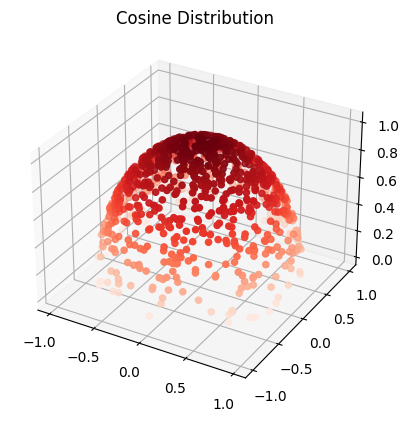

In [41]:
points = [point_in_cosine_distribution(u1[i], u2[i]) for i in range(1000)]
x, y, z = zip(*points)

fig = ply.figure()
ax = ply.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='Reds');
ax.set_title("Cosine Distribution")
ply.show()

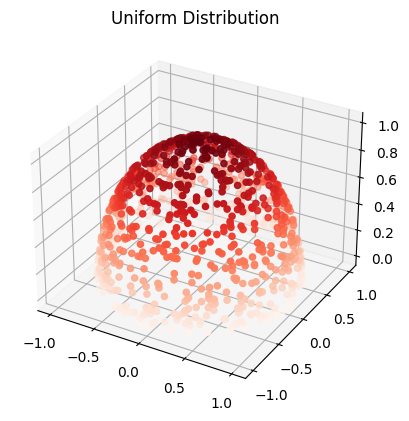

In [42]:
points = [point_in_uniform_distribution(u1[i], u2[i]) for i in range(1000)]
x, y, z = zip(*points)

fig = ply.figure()
ax = ply.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='Reds');
ax.set_title("Uniform Distribution")
ply.show()

# Distributions using blue noise

In [48]:
image = Image.open("LDR_RG01_0.png")
pixels = image.load()

u1 = []
u2 = []
w, h = image.size
for i in range(w * h):
    x = i % w
    y = i // w
    u1.append(pixels[x, y][0] / 255.0)
    u2.append(pixels[x, y][1] / 255.0)


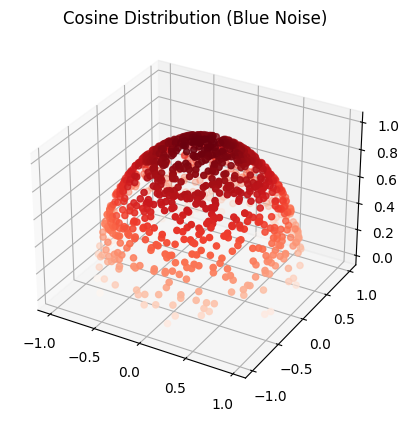

In [49]:
points = [point_in_cosine_distribution(u1[i], u2[i]) for i in range(w * h)]
x, y, z = zip(*points)

fig = ply.figure()
ax = ply.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='Reds');
ax.set_title("Cosine Distribution (Blue Noise)")
ply.show()

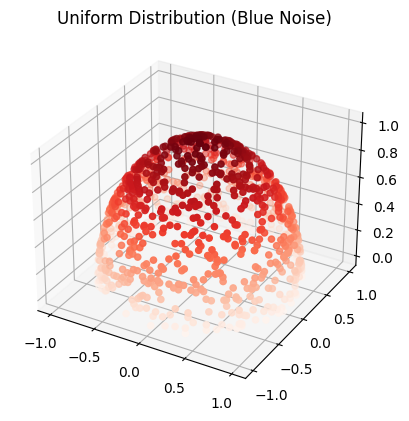

In [50]:
points = [point_in_uniform_distribution(u1[i], u2[i]) for i in range(w * h)]
x, y, z = zip(*points)

fig = ply.figure()
ax = ply.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='Reds');
ax.set_title("Uniform Distribution (Blue Noise)")
ply.show()